# Regularized Regression

**Yuanzhe(Roger) Li,  2020-01-21**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.linear_model import lasso_path, enet_path
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from itertools import cycle

## Outline
- Recap of Linear Regression
- Ridge Regression
- LASSO
- Elastic Net

## Linear regression recap

Recall that in the context of linear regression, we have 
$$\mathbf{y} = \mathbf{X \beta} + \mathbf{\epsilon}$$ 
where the target variable $\mathbf{y} \in \mathbb{R}^n$, the design matrix $\mathbf{X} \in \mathbb{R}^{n \times p}$ , the parameter vector $\mathbf{\beta} \in \mathbb{R}^p$, and the error $\epsilon_i \overset{\text{iid}}{\sim} \mathcal{N}(0,\sigma^2)$. We will use $\mathbf{x}_i (\in \mathbb{R}^p)$ to denote the $i$-th data point, $\mathbf{x}_{:j} (\in \mathbb{R}^n)$ or $\mathbf{X}_{:j}$ to denote the $j$-th variable or $j$-th column of $\mathbf{X}$.

The negative log-likelihood is 
$$L(\mathbf{y}|\mathbf{X},\mathbf{\beta}, \sigma) = \dfrac{n}{2}\log (2\pi \sigma^2) + \dfrac{1}{2\sigma^2}\sum_{i=1}^n(y_i -\mathbf{x}_i^{T}\mathbf{\beta})^2$$
Notice that the **MLE** is also the least squares soltion 
$$\hat{\mathbf{\beta}}_{\text{MLE}} = \hat{\mathbf{\beta}}_{\text{LS}} = \underset{\mathbf{\beta}}{\text{arg min}}||\mathbf{y} -\mathbf{X}\mathbf{\beta}||_2^2$$ 

## Linear regression recap (continued)
In matrix form 
$$\begin{align}
\hat{\mathbf{\beta}}_{\text{LS}} & = \underset{\mathbf{\beta}}{\text{arg min}} [(\mathbf{y - X\beta})^T(\mathbf{y - X\beta})] \\ 
& = \underset{\mathbf{\beta}}{\text{arg min}}[\mathbf{y}^T\mathbf{y} -2\mathbf{\beta}^T\mathbf{X}^T\mathbf{y} + \mathbf{\beta}^T \mathbf{X}^T\mathbf{X \beta}]  \end{align}$$
Let $\mathbf{e} = \mathbf{y - X\beta} $, and set 

$$\dfrac{\partial \mathbf{e}^T \mathbf{e}}{\partial \mathbf{\beta}} = -2 \mathbf{X}^T\mathbf{y} + 2 \mathbf{X}^T\mathbf{X}\mathbf{\beta} = \mathbf{0}$$

we have 
$$
\begin{align}
& \mathbf{X}^T\mathbf{X}\mathbf{\beta} = \mathbf{X}^T\mathbf{y} \\ 
\Rightarrow \quad & \hat{\mathbf{\beta}}_{\text{LS}}  = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}
\end{align}
$$

## Regularized regression

The loss function of regularized regression takes the following form:
$$Loss(\mathbf{\beta}) = \mathbf{E}(\mathbf{\beta}) + \mathbf{P}_\lambda(\mathbf{\beta})$$
where 
- $\mathbf{E}(\mathbf{\beta}) = \sum_{i=1}^n(y_i -\mathbf{x}_i^T\mathbf{\beta})^2$ is the sum-of-squares error,
- $\mathbf{P}_\lambda$ is a penalty function that aims at regularizing the unknown parameters, and 
- $\lambda$ is a hyperparameter that controls the tradeoff between the two components of the loss function.

## Ridge regression
### Penalty
One choice of $P_\lambda$ that favors small model parameters is to penalize the sum of squares of the regression coefficients:

$$P (\mathbf{\beta}) = \sum_{j=1}^p\beta_j^2$$

and the whole loss function becomes

$$Loss(\mathbf{\beta}) = \dfrac{1}{2}\sum_{i=1}^n(y_i -\mathbf{x}_i^{T}\mathbf{\beta})^2 + \dfrac{\lambda}{2}\sum_{j=1}^p\beta_j^2$$

which is known as ***ridge regression*** in statistics.

## Ridge regression
### Solution

The loss function of ridge regression is differentiable, and it has a simple closed-form solution

$$\hat{\mathbf{\beta}}_{\text{ridge}} = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^T \mathbf{y}$$

The solution is similar to the least squares solution with an extra diagonal matrix (i.e., $\lambda \mathbf{I}$) to be inverted, which improves the numeric stability of the system when $\mathbf{X}^T\mathbf{X}$ is close to being non-invertible. 

*Question: [what does that mean in practice?](https://stats.stackexchange.com/questions/70899/what-correlation-makes-a-matrix-singular-and-what-are-implications-of-singularit)*




## Ridge regression
### A simple example

In [2]:
# Generate data
np.random.seed(2)
x1 = np.random.normal(size=20)
x2 = np.random.normal(loc = x1, scale=0.01, size=20)
X = np.hstack([np.array(x).reshape(20,1) for x in [x1, x2]])
y = np.random.normal(loc = 3 + x1 + x2, size=20)

In [3]:
# Train an OLS model
reg_ols = linear_model.LinearRegression()
reg_ols.fit(X, y)
reg_ols.coef_

array([ 14.51690508, -12.25821163])

In [4]:
# Use ridge penalty
reg_ridge = linear_model.Ridge()
reg_ridge.fit(X, y)
reg_ridge.coef_

array([1.10585803, 1.08303544])

## Ridge regression
### Bayesian interpretation

- (**TL;DR**) Regularized least squares with ridge penalty is equivalent to the maximum a posteriori (MAP) estimator (up to a constant factor) in the Bayesian framework for linear regression with isotropic zero-mean Gaussian priors on the parameters. 

### Bayesian framework
- The goal of linear regression in the context of Bayesian inference, where a prior distribution over the model parameter vector $\mathbf{\beta}$ is assumed, is to find the posterior distribution of $\mathbf{\beta}$.

- Let $p(\mathbf{y}|\mathbf{\beta})$ denote the distribution of $\mathbf{y}$ given $\mathbf{\beta}$, and $p(\mathbf{\beta})$ the prior for $\mathbf{\beta}$, the posterior density is

$$p(\mathbf{\beta}|\mathbf{y}) = \dfrac{p(\mathbf{y}|\mathbf{\beta})p(\mathbf{\beta})}{p(\mathbf{y})} \propto p(\mathbf{y}|\mathbf{\beta})p(\mathbf{\beta})$$
or 
$$\log p(\mathbf{\beta}|\mathbf{y})  = \log p(\mathbf{y}|\mathbf{\beta}) + \log p(\mathbf{\beta}) + \text{constant}$$

- From a Bayesian perspective, one can think of the penalty as arising from a formal prior distribution on the parameters.

### Bayesian linear regression - setup

 Revisit the linear model $\mathbf{y} = \mathbf{X \beta} + \mathbf{\epsilon}$ where $\epsilon_i \overset{\text{iid}}{\sim} \mathcal{N}(0, \tau^{-1})$ where $\tau = 1/\sigma^2$ is the precision. A bayesian treatment includes the following components:

- Prior (let's assume it's Gaussian)
$$\mathbf{\beta} \sim \mathcal{N}(\mathbf{\beta} | \mathbf{m_0, S_0})$$

- Likelihood 
$$p(\mathbf{y}|\mathbf{\beta}) = \prod_{i=1}^n \mathcal{N}(y_i|\mathbf{x}_i^{T}\mathbf{\beta}, \tau^{-1})$$

- Posterior 
$$\mathbf{\beta}|\mathbf{y} \sim \mathcal{N}(\mathbf{\beta} | \mathbf{m_n, S_n})$$

Notice that Gaussian is [self-conjugate](https://en.wikipedia.org/wiki/Conjugate_prior) for Gaussian likelihood functions, we can use the fact that the posterior is also Gaussian to figure out the parameterization.

### Bayesian linear regression - posterior

- For the posterior distribution, we have 

$$
\begin{align}
\mathbf{m_n} &= \mathbf{S_n(S_0^{-1}\mathbf{m_0} + \tau\mathbf{X}^T\mathbf{y}})\\
\mathbf{S_n}^{-1} &= \mathbf{S_0}^{-1} + \tau \mathbf{X}^T\mathbf{X}
\end{align}
$$

- Assume the prior is a zero-mean isotropic Gaussian, i.e., $\mathbf{\beta} \sim \mathcal{N}(\mathbf{0}, \alpha^{-1}\mathbf{I})$. The parameterization of the posterior further reduces to the following:

$$
\begin{align}
\mathbf{m_n} &= \tau \mathbf{S_n X}^T\mathbf{y}\\
\mathbf{S_n}^{-1} &= \alpha \mathbf{I} + \tau \mathbf{X}^T\mathbf{X}
\end{align}
$$

### Connection between bayesian linear regression and ridge regression

- Since the posterior is Gaussian, we have 
$$\hat{\mathbf{\beta}}_{\text{MAP}} = \mathbf{m_n} = (\mathbf{X}^T\mathbf{X} + \dfrac{\alpha}{\tau}\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$$ 
which is the same as the ridge regression solution $(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^T \mathbf{y}$ with $\lambda = \alpha / \tau$ 
    - *Higher regularization penalty ( $\lambda\uparrow$ ) or more precise prior belief ($\alpha\uparrow$) ?*


- Alternatively, if we compare the objective fuctions. Maximization of the log of the posterior probability w.r.t $\mathbf{\beta}$ as below:
$$
\begin{align}
\log p(\mathbf{\beta}|\mathbf{y})  &= \log p(\mathbf{y}|\mathbf{\beta}) + \log p(\mathbf{\beta}) + \text{constant}\\
&= - \dfrac{\tau}{2}\sum_{i=1}^{n}(y_i -\mathbf{x}_i^T\mathbf{\beta})^2 - \dfrac{\alpha}{2}\mathbf{\beta}^T
\mathbf{\beta} + \text{constant}
\end{align}
$$
again, is equivalent to the minimization of the regularized (ridge penalty) least squares with $\lambda = \alpha / \tau$.



### Bayesian versus frequentist view
- Notice that when the prior is infinitely broad, i.e., $\mathbf{S_0}=\alpha^{-1}\mathbf{I}$ and $\alpha \rightarrow 0$, $\mathbf{\beta}_{\text{MAP}}$ is the same as the MLE estimator.

$$\lim_{\alpha \rightarrow 0}\hat{\mathbf{\beta}}_{\text{MAP}} = \lim_{\alpha \rightarrow 0}[(\mathbf{X}^T\mathbf{X} + \dfrac{\alpha}{\tau}\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}] = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} = \hat{\mathbf{\beta}}_{\text{MLE}}$$


- Despite of the connection between  $\hat{\mathbf{\beta}}_{\text{MAP}}$ and $\hat{\mathbf{\beta}}_{\text{ridge}}$ or $\hat{\mathbf{\beta}}_{\text{MLE}}$ , the similarity between Bayesian and Frequentist breaks down in other inferential respects.

### Choosing $\lambda$ in ridge regression
- Common model fitness measures for OLS such as [Mallows's $C_p$](https://en.wikipedia.org/wiki/Mallows%27s_Cp), [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion), and [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) also work for ridge regression.
- In practice, we can use k-fold cross validation to select $\lambda$ with the CV performance.

### Example of using cross validation to choose $\lambda$ for ridge regression

- Let's use simulated dataset with `effective_rank=5`.

In [5]:
X, y = make_regression(n_samples=1000, n_features=500, effective_rank = 5,
                          n_informative = 400, noise = 1.5, random_state=10)

In [6]:
# Define plotting functions
def plot_ridge_cv(reg_cv, dpi=100):
    """Plot mean and sd of cv scores from a GridSearchCV for ridge regression"""
    param = list(reg_cv.param_grid.keys())[0]
    grid = reg_cv.param_grid[param]
    score, std = reg_cv.cv_results_['mean_test_score'], reg_cv.cv_results_['std_test_score']
    best_param, best_score = reg_cv.best_params_['alpha'], reg_cv.best_score_
    fig, ax=plt.subplots(dpi=dpi)
    ax.errorbar(grid, -score, yerr=std)
    ax.set_xscale('log')
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel("Root mean-squared error")
    title = r'Best $\lambda$' + f': {round(best_param,5)}, best ' + r'$\overline{rmse}$' + f': {round(-best_score, 3)}'
    ax.set_title(title)
    ax.plot()

In [7]:
reg_ridge = linear_model.Ridge()
params = {'alpha': np.exp(np.arange(-20,10,2))}
reg_cv = GridSearchCV(reg_ridge, params, scoring = 'neg_root_mean_squared_error', cv=10)

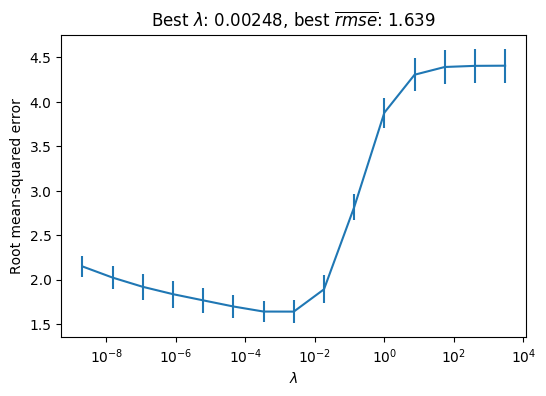

In [8]:
reg_cv.fit(X, y)
plot_ridge_cv(reg_cv)

### Remarks on ridge regression
- Ridge penalty tends to push the parameters of correlated features together, as OLS might allow one to be wildly positive and the other negative.
- The shrinkage in model parameters brought by ridge regression reduces noice and helps identify true signals in model effects.
- However, one major limitation of ridge regression is that it retains all of parameters non-zero, while a smaller subset of strong features are usually preferred for interpretability reasons.

## LASSO

- In the frame of regularized least squares, LASSO uses $\ell_1$ penalty instead of $\ell_2$ penalty in ridge regression, i.e.,

$$Loss(\mathbf{\beta}) = \frac{1}{2}\sum_{i=1}^n(y_i -\mathbf{x}_{i}^T\mathbf{\beta})^2 + \frac{\lambda}{2}\sum_{j=1}^p|\beta_j|$$

- LASSO stands for least absolute shrinkage and selectin operator.
    - *Shrinkage*: Similar to ridge regression, lasso penalizes large parameters and shrinks estimates towards zero
    - *Selection*: Unlike ridge, lasso actually pushes parameter estiamtes to zero and produces sparse solutions.


In [9]:
def plot_penalties():
    """Plot L1, L2, and ElasticNet penalties
    https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_penalties.html#sphx-glr-auto-examples-linear-model-plot-sgd-penalties-py
    """
    l1_color = "navy"
    l2_color = "c"
    elastic_net_color = "darkorange"

    line = np.linspace(-1.5, 1.5, 1001)
    xx, yy = np.meshgrid(line, line)

    l2 = xx ** 2 + yy ** 2
    l1 = np.abs(xx) + np.abs(yy)
    rho = 0.5
    elastic_net = rho * l1 + (1 - rho) * l2

    plt.figure(figsize=(6, 6), dpi=80)
    ax = plt.gca()

    elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1],
                                      colors=elastic_net_color)
    l2_contour = plt.contour(xx, yy, l2, levels=[1], colors=l2_color)
    l1_contour = plt.contour(xx, yy, l1, levels=[1], colors=l1_color)
    ax.set_aspect("equal")
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    plt.clabel(elastic_net_contour, inline=1, fontsize=18,
               fmt={1.0: 'elastic-net'}, manual=[(-1, -1)])
    plt.clabel(l2_contour, inline=1, fontsize=18,
               fmt={1.0: 'L2'}, manual=[(-1, -1)])
    plt.clabel(l1_contour, inline=1, fontsize=18,
               fmt={1.0: 'L1'}, manual=[(-1, -1)])

    plt.tight_layout()
    plt.show()

### Why does LASSO generate sparse solutions?

- Constrained optimization
    - Ridge 
$$\min_{\mathbf{\beta}}||\mathbf{y}-\mathbf{X\beta}||_2^2 \quad \text{s.t.} ||\mathbf{\beta}||_2 \leq t$$
    - LASSO
$$\min_{\mathbf{\beta}}||\mathbf{y}-\mathbf{X\beta}||_2^2 \quad \text{s.t.} ||\mathbf{\beta}||_1 \leq t$$

- Geometric view

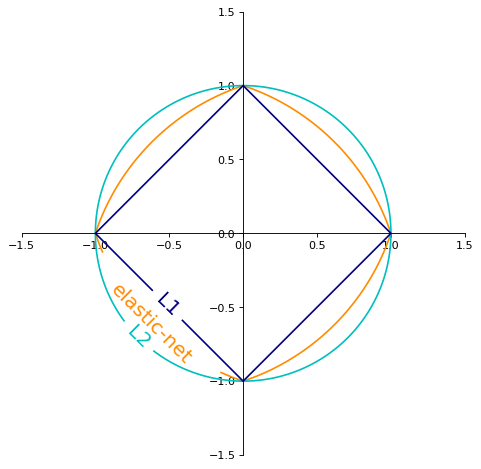

In [10]:
plot_penalties()

### Algorithms for LASSO
- Challenges of solving a LASSO model 
    - Unlike ridge regression, lasso is not strictly convex when $\mathbf{X}^T\mathbf{X}$ is not full rank, thus it may not have a unique solution. 
    - Since $\ell_1$ penalty is not differentiable at $\beta_j=0$, vanilla gradient descent method doesn't work.

- There are two popular algorithms (as currently inplemented in `sklearn`) to solve LASSO models.
    - Coordinate descent (CD)
    - Least-angle regression (LARS)

### Coordinate descent


- Idea: minimization of a multivariate function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ can be tackled by repeatedly solving univariate optimization along one direction.
    - Start with $\mathbf{x}^0 = (x_1^0, ..., x_n^0)$,
    - at round $k+1$, define $\mathbf{x}^{k+1}$ from $\mathbf{x}^k$ by iteratively solving the single-variable optimization problem: $$x_i^{k+1} = \text{arg}\min_z f(x_1^{k+1},..., x_{i-1}^{k+1}, z, x_{i+1}^{k}, ..., x_{n}^k), \quad \text{for }i=1,...,n$$
    - Repeat until convergence.

#### When does coordinate-wise minimization work?

- $f: \mathbb{R}^n \rightarrow \mathbb{R}$ convex and differentiable? YES.
- $f: \mathbb{R}^n \rightarrow \mathbb{R}$ convex but not differentiable? NO.
- However, if $f(\mathbf{x}) = g(\mathbf{x}) + \sum_i^n h_i(x_i)$ with $g$ convex and differentiable, and each $h_i$ convex, the answer is YES again.
- Notice LASSO meets the above requirement with $g(\mathbf{\beta}) = \dfrac{1}{2}||\mathbf{y} - \mathbf{X\beta}||^2$ and $h_i(\beta_i) = \lambda|\beta_i|$ for $i = 1,...,p$.

#### CD scheme for LASSO
- Idea: we repeatedly cycle through the model parameters, and in each step, optimize only a single parameter ($\beta_j$)
    - To update $\beta_j$, we solve the following univariate minimization problem
$$\min_{\beta_j\in \mathbb{R}} \frac{1}{2}||\mathbf{y} - \sum_{i: i\neq j}\mathbf{X}_{:i}\beta_i - \mathbf{X}_{:j}\beta_j||^2 + \lambda |\beta_j| + \lambda \sum_{i:i\neq j}|\beta_i|$$
where $\mathbf{X}_{:i}$ is the $i$-th column of the design matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$.
    - The solution to the above problem turns out to be 
$$\beta_j \leftarrow \psi_{\text{st}}( \dfrac{\mathbf{X}_{:j}^T(\mathbf{y}- \sum_{i:i\neq j}\mathbf{X}_{:i}\beta_i)}{||\mathbf{X}_{:j}||^2}; \dfrac{\lambda}{||\mathbf{X}_{:j}||^2})$$
where $\psi_{\text{st}}$ is the *soft thresholding* operator (more on $\psi_{\text{st}}$ and how to solve the univariate lasso later)
    - We cycle through $\beta_j$ for $j = 1,..., d$ and repeat the process until convergence.

#### Subgradients and optimality
- For convex function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, its ***subgradient*** at $x$ is defined as 
$$\partial f(x) = \{s\in \mathbb{R}^n| f(z) - f(x) \geq  s^T(z-x), \forall z \in \mathbf{dom} f\}$$
- If $f$ is differentiable, than its subgradient at $x$ is its gradient. If $f$ is not differentiable, it can have multiple subgradients.
- **Theorem**: for any convex function $f(\mathbf{x})$, $\mathbf{x}^*$ is an optimal solution $\iff$ $\mathbf{0} \in \partial f(\mathbf{x}^*)$, where $\partial f(\mathbf{x})$ is the set of all subgradients at $\mathbf{x}$.
    - Use $f(\beta) = |\beta|$ as an example, it's subgradient $s = \partial f(\beta)$ is 
    $$\begin{cases}
      s = \text{sign}(\beta), & \beta \neq 0 \\
      s \in [-1, 1], & \beta = 0
    \end{cases}$$
    - Notice the optimal solution $\beta^* = 0$ and $0 \in \partial f(0)$.

#### Optimality for univariate LASSO
- Now let's look at the univariate LASSO. WLOG, we consider $\min_{\beta \in \mathbb{R}} \frac{1}{2}||\mathbf{y}-\beta \mathbf{z}||^2+\lambda |\beta|$, which is convex but not differentiable due to the addition of the $\ell_1$ regularization term.
    - its subgradient $g = \mathbf{z}^T(\beta \mathbf{z}-\mathbf{y}) + \lambda \cdot s$ where $s$ is the subgradient of $|\beta|$
    - The optimality happens when $0 \in g \iff \mathbf{z}^T\mathbf{y} - \beta ||\mathbf{z}||^2 \in \lambda s$, let's take this case by case
        - If $\beta = 0$, we have  $\mathbf{z}^T\mathbf{y} \in [-\lambda, \lambda]$, i.e., $|\mathbf{z}^T\mathbf{y}| \leq \lambda$
        - If $\beta > 0$, we have $\beta = \dfrac{\mathbf{z}^T\mathbf{y}}{||\mathbf{z}||^2} - \dfrac{\lambda}{||\mathbf{z}||^2} > 0$, i.e., $\mathbf{z}^T\mathbf{y} > \lambda$
        - Finally, if $\beta < 0$, we have $\beta = \dfrac{\mathbf{z}^T\mathbf{y}}{||\mathbf{z}||^2} + \dfrac{\lambda}{||\mathbf{z}||^2} < 0$, i.e., $\mathbf{z}^T\mathbf{y} < -\lambda$

#### Use univariate solution in CD
- So we have verified that in univariate case, the LASSO estimator is $\hat{\beta} = \psi_{\text{st}}(\dfrac{\mathbf{z}^T\mathbf{y}}{||\mathbf{z}||^2}; \dfrac{\lambda}{||\mathbf{z}||^2})$, where the ***soft thresholding*** operator is defined as follows:

$$ \psi_{\text{st}}(a; \gamma)= \begin{cases}
  a - \gamma, & \text{if } a \geq \gamma, \\
  a + \gamma, & \text{if } a \leq -\gamma \\
  0, &         \text{else}
\end{cases}$$

- Hence in the multivariate setting, coordinate update is given by
$$\beta_j \leftarrow \psi_{\text{st}}( \dfrac{\mathbf{X}_{:j}^T(\mathbf{y}- \sum_{i:i\neq j}\mathbf{X}_{:i}\beta_i)}{||\mathbf{X}_{:j}||^2}; \dfrac{\lambda}{||\mathbf{X}_{:j}||^2})$$
as previously shown.
- *Question*: did you notice how it relates to the OLS solution?

### Least angle regression (LARS)
- LARS is the first efficient algorithm to solve LASSO, and it's more intuitively related to variable selection property of LASSO.

- Basic steps of LARS are as follows:
    - Start with all parameters $\beta$ equal to zero ($\lambda_{\infty}$)
    - Lower $\lambda$ to allow the parameter $\beta_j$ to the predictor $\mathbf{x}_{:j}$ that is most correlated with $\mathbf{y}$ into the model.
    - Increase $\beta_j$ in the direction of the sign of corr$(\mathbf{x}_{:j}, \mathbf{y})$ and take residuals $\mathbf{r} = \mathbf{y}-\hat{\mathbf{y}}$ along the way. Stop when another predictor $\mathbf{x}_{:k}$ has as much correlation with $\mathbf{r}$ as $\mathbf{x}_{:j}$.
    - Include $\mathbf{x}_{:k}$ and increase ($\beta_j, \beta_k$) in their joint least squares direction (i.e., projection of $\mathbf{r}$ onto $[\beta_j, \beta_k]^T$) until the next predictor $\mathbf{x}_{:m}$ reaches the necessary level of correlation with $\mathbf{r}$, all with $\lambda$ lowered along the way.
    - Repeat until $\lambda$ hits a predetermined threshold or small enough for all the variables to be included.

In [11]:
def run_lars_example(dpi=100):
    """Run LARS example from sklearn
    https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html
    """
    X, y = datasets.load_diabetes(return_X_y=True)
    _, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    fig, ax=plt.subplots(dpi=dpi)
    ax.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    ax.vlines(xx, ymin, ymax, linestyle='dashed')
    ax.set_xlabel('|coef| / max|coef|')
    ax.set_ylabel('Coefficients')
    ax.set_title('LASSO Path')
    ax.autoscale(enable=False, tight=True)

#### LARS example
- Let's look at an example of using LARS to compute the LASSO path along the regularization parameter.

.

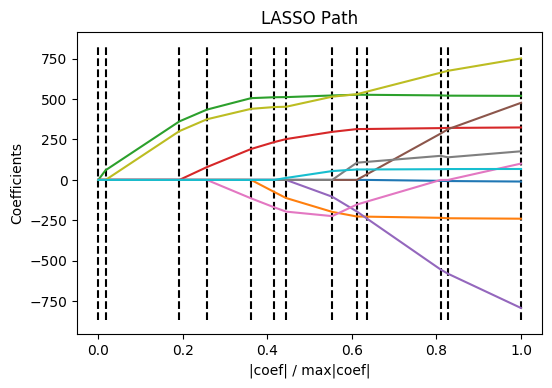

In [12]:
run_lars_example()

#### Remarks on LARS
- Notice that when solving LASSO using LARS, we always proceed in the direction such that every active predictor is equally correlated with the residual $\mathbf{r}$, which is consistent with the optimality conditions of LASSO.

- LARS is efficient and requires computations at the same order of magnitude as OLS.

- Nevertheless, coordinate descent (and its variant) has become more popular due to its simplicity and flexibility.
    - Apply coordinate-specific thresholding functions (group LASSO).
    - Advancement in gradient-based optimization algorithms (e.g., randomized block-coordinate, stochastic optimization on large problems).

### Bayesian interpretation of LASSO
- Come back to the linear model $\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}$, where $\mathbf{\epsilon} \sim \mathcal{N}(\mathbf{0}, \sigma^2\mathbf{I})$.
- Impose an i.i.d zero-mean [Laplacian prior](https://en.wikipedia.org/wiki/Laplace_distribution) on each $\beta_j$ (for $j = 1,...,p$) to encourage sparsity, i.e.,
$$\beta_j \sim \frac{1}{2b}\exp(-\dfrac{|\beta_j|}{b})$$
where $b$ controls the variance of the Laplace distribution.

In [13]:
def compare_gauss_laplace(loc = 0., scale = 1., dpi = 100):
    """Plot gaussian and laplacian with (loc, scale) together"""
    x = np.arange(-8., 8., .01)
    laplace = np.exp(-abs(x-loc)/scale)/(2.*scale)
    gauss = (1/(scale * np.sqrt(2 * np.pi)) * np.exp(-(x - loc)**2 / (2 * scale**2)))
    fig, ax=plt.subplots(dpi=dpi)
    ax.plot(x, laplace)
    ax.plot(x, gauss)
    ax.legend(['Laplacian', 'Gaussian'], loc = 'upper right')
    ax.grid(True)

- Laplace distribution looks pointier than Gaussian.

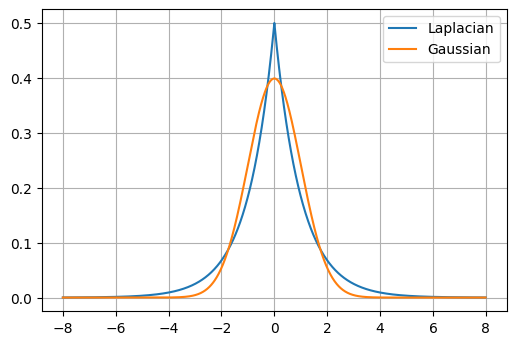

In [14]:
compare_gauss_laplace(loc = 0.0, scale = 1)

### Bayesian interpretation of LASSO (continued)
- Recall that the likelihood function
$$p(\mathbf{y}|\mathbf{\beta}) = \prod_{i=1}^n \mathcal{N}(y_i|\mathbf{x}_i^T\mathbf{\beta}, \sigma^2)$$
- The posterior distribution of $\mathbf{\beta}$ can be derived as follows:
$$
\begin{align}
p(\mathbf{\beta}|\mathbf{y}) & \propto p(\mathbf{y} | \mathbf{\beta})p(\mathbf{\beta}) \\ 
 &\propto \prod_{i=1}^{n}\exp[-\frac{(\mathbf{y}_i-\mathbf{x}_i^T\mathbf{\beta})^2}{2\sigma^2}] \cdot \prod_{j=1}^p \dfrac{1}{2b} \exp[-\dfrac{|\beta_j|}{b}] \\ 
& \propto \prod_{}^{n}\exp[-(\mathbf{y}_i-\mathbf{x}_i^T\mathbf{\beta})^2] \cdot \prod_{j=1}^p \exp[-\lambda|\beta_j|]
\end{align}
$$
- Hense the MAP estimator is equivalent to the LASSO solution as shown below 
$$\hat{\mathbf{\beta}}_{\text{MAP}} = \text{arg} \max_{\mathbf{\beta}} - [\sum_{i=1}^n (y_i - \mathbf{x}_i^T\mathbf{\beta})^2 + \lambda \sum_{j=1}^p|\beta_i|] = \hat{\mathbf{\beta}}_{\text{LASSO}} $$

## Elastic Net

- While the feature selection property of LASSO can be an advantage, in some cases, however, we may prefer highly correlated features to have similar parameters. For example, we might want a model with useless features completely removed, and useful yet correlated features all included and have similar weights.

- By combining $\ell_1$ and $\ell_2$ penalty, elastic net enables effective regularization with stability and feature selection at the same time.
    

- The elastic penalty function is shown below

$$\mathbf{P}_\lambda (\mathbf{\beta}) = \lambda_1||\mathbf{\beta}||_1 + \dfrac{\lambda_2}{2}||\mathbf{\beta}||_2^2$$

### Solution of Elastic Net
- The uniqueness of Elastic Net solution is guaranteed because of the ridge penalty.
- Similar to LASSO, Elastic Net can be solved using coordinate descent or LARS to a slightly modified optimal solution
$$\hat{\beta_j} = \psi_{\text{st}}( \frac{\mathbf{X}_{:j}^T(\mathbf{y}- \sum_{i:i\neq j}\mathbf{X}_{:i}\beta_i)}{||\mathbf{X}_{:j}||^2}; \frac{\lambda_1}{||\mathbf{X}_{:j}||^2}) / (1+\lambda_2) = \frac{\hat{\beta}_{\text{(LASSO)}-j}}{1+\lambda_2} $$
- The added ridge penalty has the same effect on the  LASSO solution as it has on OLS, which is to prvoide shrinkage.

### Grouping effect
- Unlike LASSO, which tends to randomly select one of the highly correlated features, the Elastic Net solution has a property known as the *grouping effect*, which states that highly correlated features will have similar estimated parameters:
$$|\hat{\beta_j} -\hat{\beta_k}| \leq \dfrac{|\mathbf{y}|\sqrt{2(1-\rho_{jk})}}{\lambda_2}$$
where $\rho_{jk} = \hat{\text{corr}}(\mathbf{x}_{:j},\mathbf{x}_{:k})$ is the sample correlation betwwo the $j$-th and $k$-th feature.
- Note that as $\rho_{jk} \rightarrow 1$, the difference between $\hat{\beta_j}$ and $\hat{\beta_k}$ goes to zero.

### Example of  Elastic Net versus LASSO
Let's compare the paths of Elastic Net and LASSON on a simulated dataset with highly correlated features (Tibshirani, 2011).

In [15]:
# Generate dataset with correlated features
np.random.seed(10)
n, sd = 100, 0.25

# True signals and target variable
z1, z2 = (np.random.uniform(0, 20, size) for size in [n]*2)
y = np.random.normal(loc = z1 + 0.1*z2, size=n)

# group 1
x1 = z1 + np.random.normal(scale=sd, size=n)
x2 = -z1 + np.random.normal(scale=sd, size=n)
x3 = z1 + np.random.normal(scale=sd, size=n)

# group 2
x4 = z2 + np.random.normal(scale=sd, size=n)
x5 = -z2 + np.random.normal(scale=sd, size=n)
x6 = z2 + np.random.normal(scale=sd, size=n)

X = np.hstack(([x.reshape(n, 1) for x in [x1, x2, x3, x4, x5, x6]]))

In [16]:
def compare_enet_lasso(X, y, eps = 1e-2, dpi = 100):
    """Compare Elastic Net and Lasso on simulated data
    by plotting their coefficient paths together
    
    Arguments:
        X, y -- predictor and target variable
        eps  -- length of the path, alpha_min/alpha_max, 
                the smaller it is, the longer the path
        dpi  -- resolution of the created plot
    """
    alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
    alphas_enet, coefs_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
    fig, ax=plt.subplots(dpi=dpi)
    colors = cycle(['b', 'r', 'g', 'c','m' ,'k'])
    neg_log_alphas_lasso = -np.log10(alphas_lasso)
    neg_log_alphas_enet = -np.log10(alphas_enet)
    for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

    ax.set_xlabel('- Log(alpha)')
    ax.set_ylabel('coefficients')
    ax.set_title('Lasso and Elastic-Net Paths')
    ax.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='upper left')
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    ax.autoscale(enable=False, tight=True)

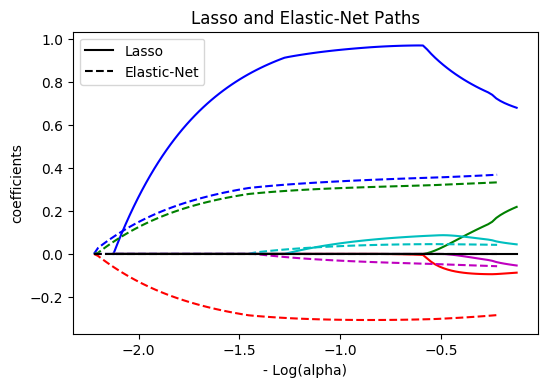

In [17]:
compare_enet_lasso(X, y)

### Remarks on Elastic Net
- Elastic Net combines the penalty functions of Ridge Regression and LASSO to simultaneously achieve shrinkage and feature seletion.
- It's able to produce a sparse model with grouping effect.
- The elastic net penalty are widely adopted in many types of machine learning models, such as XGBoost and neural networks.

## References
- Bishop, C. M. (2006). *Pattern recognition and machine learning*. springer.
- Breheny, P. (2016). *BIOS 7600: High-Dimensional Data Analysis* [lecture notes]. Retrieved from [this link](https://myweb.uiowa.edu/pbreheny/7600/s16/notes.html).
- Chen, Y. (2017). *ELE538B: Sparsity, Structure and Inference - Lasso: algorithms and extensions* [lecture slides]. Retrieved from [this link](http://www.princeton.edu/~yc5/ele538b_sparsity/lectures/lasso_algorithm_extension.pdf).
- Tibshirani, R. (1996). Regression shrinkage and selection via the lasso. *Journal of the Royal Statistical Society: Series B (Methodological), 58*(1), 267-288.
- Tibshirani, R. (2011). Regression shrinkage and selection via the lasso: a retrospective. *Journal of the Royal Statistical Society: Series B (Statistical Methodology), 73*(3), 273-282.
- [Scikit-learn User Guide - 1.1 Linear Models](https://scikit-learn.org/stable/modules/linear_model.html#)
- Zou, H., & Hastie, T. (2005). Regularization and variable selection via the elastic net. *Journal of the royal statistical society: series B (statistical methodology), 67*(2), 301-320.